Work Flow:
*   Project-specific
*   Modeling script
*   Performance output
*   Hyperparameter Tuning






## Load data

In [1]:
pip install python-helpers


In [2]:
pip install -U threadpoolctl

In [1]:
import os
import time
import random
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import optimizers, metrics
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model
from sklearn import model_selection, preprocessing, metrics, feature_extraction, datasets

C:\Users\fx.chen.2021\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import pandas as pd
import os
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# make sure that the helpers6.py and dataset_path.py files are in the same folder as this jupyter notebook
from helpers6 import *

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('data/final_data.csv')
data.head()

confidence_interval = 95
random_seed=2024

In [5]:
data.groupby('Churn Value').apply(lambda x: x.index.nunique())

Churn Value
0    5174
1    1869
dtype: int64

In [6]:
data

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,CLTV,Income per capita
0,1,0,0,0,-1.236724,1,0,0,2,2,...,0,0,0,1,3,-0.362660,-0.959674,1,-0.981675,0.171608
1,0,0,0,1,-1.236724,1,0,1,0,0,...,0,0,0,1,2,0.197365,-0.940470,1,-1.436462,0.171608
2,0,0,0,1,-0.992402,1,2,1,0,0,...,2,2,0,1,2,1.159546,-0.645186,1,0.821409,0.171608
3,0,0,1,1,-0.177995,1,2,1,0,0,...,2,2,0,1,2,1.330711,0.337349,1,0.509483,0.171608
4,1,0,0,1,0.677133,1,2,1,0,2,...,2,2,0,1,0,1.294151,1.216004,1,0.794358,0.171608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,1.613701,1,0,2,1,1,...,1,1,2,1,0,-1.449476,-0.380784,0,0.765617,-1.384930
7039,1,0,1,1,-0.340876,1,2,0,2,0,...,2,2,1,1,3,0.665992,-0.128655,0,-1.910691,-0.887687
7040,0,0,1,1,1.613701,1,2,1,0,2,...,2,2,1,1,1,1.277533,2.243151,0,0.980330,-1.384930
7041,0,0,1,1,-0.870241,0,1,0,2,0,...,0,0,0,1,2,-1.168632,-0.854469,0,-1.358692,-1.384930


In [7]:
x = data.drop('Churn Value', axis = 1).values
y = data['Churn Value'].values

smote = SMOTE(sampling_strategy = 1)
x,y = smote.fit_resample(x, y)

In [8]:
columns = data.columns.tolist()
resampled_df = pd.DataFrame(x, columns=columns[:-1])

resampled_df

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,CLTV
0,1.000000,0.0,0.0,0.00000,-1.236724,1.0,0.0,0.0,2.000000,2.0,...,0.0,0.0,0.000000,0.000000,1.000000,3.0,-0.362660,-0.959674,-0.981675,0.171608
1,0.000000,0.0,0.0,1.00000,-1.236724,1.0,0.0,1.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,1.000000,2.0,0.197365,-0.940470,-1.436462,0.171608
2,0.000000,0.0,0.0,1.00000,-0.992402,1.0,2.0,1.0,0.000000,0.0,...,0.0,2.0,2.000000,0.000000,1.000000,2.0,1.159546,-0.645186,0.821409,0.171608
3,0.000000,0.0,1.0,1.00000,-0.177995,1.0,2.0,1.0,0.000000,0.0,...,2.0,2.0,2.000000,0.000000,1.000000,2.0,1.330711,0.337349,0.509483,0.171608
4,1.000000,0.0,0.0,1.00000,0.677133,1.0,2.0,1.0,0.000000,2.0,...,0.0,2.0,2.000000,0.000000,1.000000,0.0,1.294151,1.216004,0.794358,0.171608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,1.000000,0.0,0.0,0.00000,-1.277445,1.0,2.0,1.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,1.000000,2.0,0.330361,-0.974441,-1.484668,-0.461538
10344,1.000000,0.0,0.0,0.00000,-1.244661,1.0,0.0,1.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.201274,2.0,0.183046,-0.953752,-0.183642,0.111298
10345,0.045278,0.0,1.0,0.00000,1.023335,1.0,2.0,1.0,0.090557,0.0,...,2.0,2.0,2.000000,0.045278,1.000000,1.0,1.254141,1.578679,-0.028563,-1.384930
10346,1.000000,0.0,1.0,0.37489,-0.737855,1.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,1.250219,0.000000,0.374890,2.0,-0.322754,-0.665279,-0.949307,0.345523


In [9]:
#Split train and test set:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, random_state =random_seed, test_size = 0.2)

In [10]:
# Containers for all results
result_list = []

## Modeling script

## Logistic Regression

Logistic Regression:
Training time: 0.049623727798461914 seconds
AUC: 0.8627310924369749
AUPRC: 0.8392106707727895
Sensitivity: 0.8142857142857143
Specificity: 0.7715686274509804
Score thresold: 0.5398219142898869
2.5 97.5


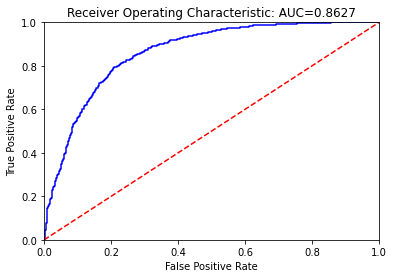

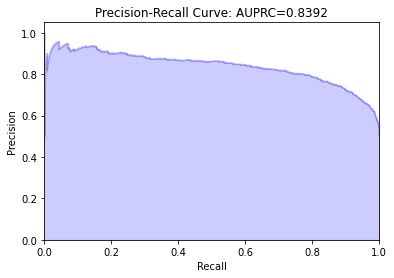

In [12]:
print("Logistic Regression:")
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=random_seed)
start = time.time()
logreg.fit(x_train,y_train)
runtime = time.time()-start
import pickle
with open('task1_logreg.pickle', 'wb') as model_dump:
    pickle.dump(logreg, model_dump)
print('Training time:', runtime, 'seconds')
probs = logreg.predict_proba(x_test)
result = PlotROCCurve(probs[:,1],y_test, ci=confidence_interval, random_seed=random_seed)

results = ["LR"]
results.extend(result)
results.append(runtime)
result_list.append(results)


### Random Forest

RandomForest:
Training time: 1.7645759582519531 seconds
AUC: 0.9420079365079365
AUPRC: 0.9366271303641216
Sensitivity: 0.8561904761904762
Specificity: 0.8764705882352941
Score thresold: 0.56
2.5 97.5


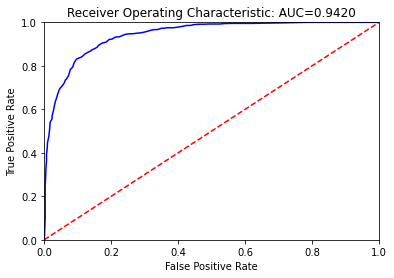

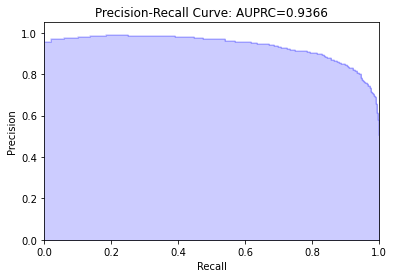

[0.02543282 0.02004499 0.02962953 0.06924011 0.11080657 0.00488842
 0.01511295 0.0285122  0.0648023  0.01853776 0.01612847 0.0333383
 0.01225605 0.01134149 0.11858111 0.04241946 0.05099252 0.08879952
 0.09103212 0.07820832 0.069895  ]


In [13]:
print("RandomForest:")
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(random_state=random_seed)
start = time.time()
rf.fit(x_train,y_train)
runtime = time.time()-start
print('Training time:', runtime, 'seconds')
probs_RF = rf.predict_proba(x_test)
result = PlotROCCurve(probs_RF[:,1],y_test, ci=confidence_interval, random_seed=random_seed)
importances = rf.feature_importances_
print(importances)
results = ["RF"]
results.extend(result)
results.append(runtime)
result_list.append(results)

### Grediant boost

GradientBoosting:
Training time: 2.484583854675293 seconds
AUC: 0.9360322128851539
AUPRC: 0.9423690662513747
Sensitivity: 0.8742857142857143
Specificity: 0.8450980392156863
Score thresold: 0.508897816954368
2.5 97.5


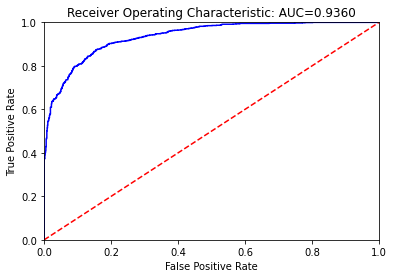

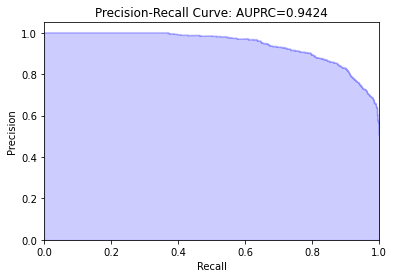

In [14]:
print("GradientBoosting:")
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=random_seed)
start = time.time()
gb.fit(x_train, y_train)
runtime = time.time()-start
print('Training time:', runtime, 'seconds')
probs = gb.predict_proba(x_test)
result = PlotROCCurve(probs[:,1],y_test, ci=confidence_interval, random_seed=random_seed)

results = ["GB"]
results.extend(result)
results.append(runtime)
result_list.append(results)

### MLP

In [19]:
# skip this cell if not retraining
mlp = MLP()
mlp.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy', 'AUC',  #{'auprc': metrics.AUC(name='auprc', curve='PR')},
                       'TruePositives', 'TrueNegatives', 'Precision', 'Recall'])
start = time.time()
mlp.fit(x_train.astype(np.float32), y_train, batch_size=200, epochs=20)
runtime = time.time() - start
print('Training time:', runtime, 'seconds')
mlp.save('AML_mlp')

NameError: name 'MLP' is not defined

MLP:
65/65 [==============================] - 0s 3ms/step
AUC: 0.8899140989729225
AUPRC: 0.8637996658847858
Sensitivity: 0.86
Specificity: 0.7833333333333333
Score thresold: 0.45469275
2.5 97.5


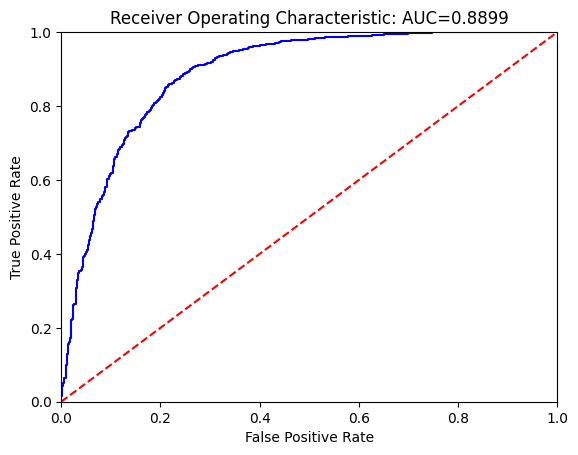

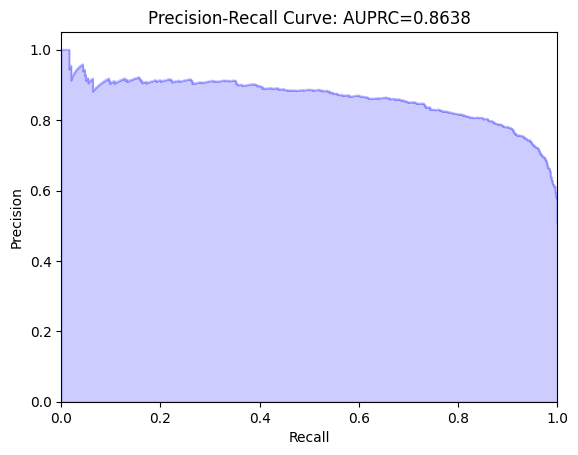

In [26]:
print("MLP:")
#mlp = load_model('AML_mlp')
probs = mlp.predict(x_test.astype(np.float32))
result = PlotROCCurve(probs,y_test, ci=confidence_interval, random_seed=random_seed)
results = ["MLP"]
results.extend(result)
results.append(runtime)
result_list.append(results)

## Get Performance Score

In [17]:
def get_score_performance(s, random_seed=0):
    print(s)
    score = np.array(df_test[s])
    result = PlotROCCurve(score,y_test, ci=confidence_interval, random_seed=random_seed)
    runtime = 0
    results = [s]
    results.extend(result)
    results.append(runtime)
    result_list.append(results)

In [28]:
#df_test["esi"] = -df_test["triage_acuity"]
#get_score_performance("esi", random_seed=random_seed)

NameError: name 'df_test' is not defined

## Performance Output

In [18]:
#result_df = pd.read_csv(os.path.join(path, 'result_hospitalization_triage.csv'))
result_df = pd.DataFrame(result_list, columns=['Model', 'auroc', 'ap', 'sensitivity', 'specificity', 'threshold', 'lower_auroc', 'upper_auroc', 'std_auroc', 'lower_ap', 'upper_ap', 'std_ap', 'lower_sensitivity', 'upper_sensitivity', 'std_sensitivity', 'lower_specificity', 'upper_specificity', 'std_specificity', 'runtime'])
result_df = result_df.round(3)
formatted_result_df = pd.DataFrame()
formatted_result_df[['Model', 'Threshold']] = result_df[['Model', 'threshold']]
formatted_result_df['AUROC'] = result_df['auroc'].astype(str) + ' (' + result_df['lower_auroc'].astype(str) + \
                               '-' + result_df['upper_auroc'].astype(str) + ')'
formatted_result_df['AUPRC'] = result_df['ap'].astype(str) + ' (' + result_df['lower_ap'].astype(str) + \
                               '-' + result_df['upper_ap'].astype(str) + ')'
formatted_result_df['Sensitivity'] = result_df['sensitivity'].astype(str) + ' (' + result_df['lower_sensitivity'].astype(str) + \
                                     '-' + result_df['upper_sensitivity'].astype(str) + ')'
formatted_result_df['Specificity'] = result_df['specificity'].astype(str) + ' (' + result_df['lower_specificity'].astype(str) + \
                                     '-' + result_df['upper_specificity'].astype(str) + ')'
formatted_result_df[['Runtime']] = result_df[['runtime']]
#formatted_result_df.to_csv(os.path.join(path, 'task1.csv'), index=False)
formatted_result_df

,Model,Threshold,AUROC,AUPRC,Sensitivity,Specificity,Runtime
0,LR,0.540,0.863 (0.844-0.877),0.839 (0.809-0.864),0.814 (0.776-0.842),0.772 (0.753-0.813),0.050
1,RF,0.560,0.942 (0.928-0.948),0.937 (0.914-0.946),0.856 (0.822-0.901),0.876 (0.845-0.899),1.765
2,GB,0.509,0.936 (0.925-0.942),0.942 (0.929-0.95),0.874 (0.85-0.884),0.845 (0.823-0.88),2.485


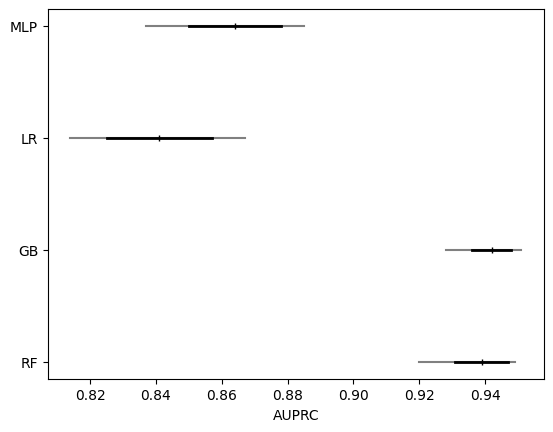

In [40]:
plot_confidence_interval(result_df, metric='ap', ci=confidence_interval, name = "AUPRC",
                         my_file = 'AUPRC_hosp.eps',my_path ='/content/' )

## Hyperparameter tuning-GB




Hyper-parameters to tune:
*   learning_rate: [1, 0.5, 0.25, 0.1, 0.05, 0.01]
*   n_estimators: [1, 2, 4, 8, 16, 32, 64, 100, 200]
*   max_depth: np.linspace(1, 10, 10, endpoint=True)
*   min_samples_split: [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
*   min_samples_leaf = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
*   max_features = [5,10,15,20,25,50,100,None]



References: https://medium.com/all-things-ai/in-depth-parameter-tuning-for-gradient-boosting-3363992e9bae

Other References:
https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/
https://www.datasciencelearner.com/gradient-boosting-hyperparameters-tuning/

In [22]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [23]:
# Assign range of values for the hyperparameters

# learning rate shrinks the contribution of each tree by learning_rate.
# There is a trade-off between learning_rate and n_estimators.
learning_rate = [1, 0.5, 0.25, 0.1, 0.05, 0.01]

# n_estimators represents the number of trees in the forest. Usually the higher the number of trees the better to learn the data.
# However, adding a lot of trees can slow down the training process considerably
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]

#max_depth indicates how deep the built tree can be.
#The deeper the tree, the more splits it has and it captures more information about how the data.
max_depth = np.linspace(1, 10, 10, endpoint=True,dtype = int)


# min_samples_split represents the minimum number of samples required to split an internal node
# Here we will vary the parameter from 10% to 100% of the samples
min_samples_split = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

#min_samples_leaf is The minimum number of samples required to be at a leaf node.
#This similar to min_samples_splits, however, this describe the minimum number of samples of samples at the leafs.
min_samples_leaf = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

# max_features represents the number of features to consider when looking for the best split.
max_features = [5,10,15,20,25,50,100,None]

### Tuning: learnig_rate and n_estimators

In [24]:
# Create the parameters for tuning
param_grid = {'learning_rate': learning_rate,
              'n_estimators': n_estimators}

clf = GradientBoostingClassifier(random_state=1234)
rand_search = RandomizedSearchCV(estimator=clf, param_distributions=param_grid, scoring='roc_auc', n_iter=50, n_jobs=-1, refit=True,cv=5, verbose =3)

start = time.time()

# Fit the grid search model
rand_search.fit(x_train,y_train)

runtime = time.time()-start

print('Random Grid Search Tuning time:', runtime, 'seconds')

rand_search_results = pd.DataFrame(rand_search.cv_results_)

print('Best Score: ', rand_search.best_score_)
print('Best Params: ', rand_search.best_params_)

# Rename mean_test_score to mean_roc_auc
rand_search_results["mean_roc_auc"] = rand_search_results['mean_test_score']

# For rearranging of columns
columns = [f"param_{name}" for name in param_grid.keys()]
columns += ["mean_roc_auc","rank_test_score"]

#Output results from Grid Search
rand_search_results[columns].sort_values(by="rank_test_score", ascending=True).reset_index(drop=True)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Random Grid Search Tuning time: 57.628286600112915 seconds
Best Score:  0.9400179109317742
Best Params:  {'n_estimators': 200, 'learning_rate': 0.1}


,param_learning_rate,param_n_estimators,mean_roc_auc,rank_test_score
0,0.1,200,0.940018,1
1,0.25,100,0.939956,2
2,0.25,64,0.939267,3
3,0.25,200,0.938665,4
4,0.05,200,0.936872,5
5,0.5,64,0.935590,6
6,0.5,32,0.935247,7
7,0.25,32,0.933799,8
8,0.5,100,0.932751,9
9,0.5,16,0.931922,10


In [26]:
# Replace tuned parameter(s) with best value
learning_rate = []
learning_rate.append(rand_search.best_params_['learning_rate'])

n_estimators = []
n_estimators.append(rand_search.best_params_['n_estimators'])

learning_rate, n_estimators

([0.1], [200])

In [27]:
learning_rate = [0.1]
n_estimators = [200]

### Tuning: Max_Depth

In [28]:
# Create the parameters for tuning
param_grid = {'learning_rate': learning_rate,
              'n_estimators': n_estimators,
              'max_depth': max_depth}

print(param_grid)

clf = GradientBoostingClassifier(random_state=1234)
# Instantiate the grid search model
gb_grid = GridSearchCV(estimator = clf, param_grid = param_grid,
                       scoring = 'f1', cv = 5, refit = True,
                       n_jobs = -1, verbose = 3)

start = time.time()

# Fit the grid search model
gb_grid.fit(x_train,y_train)

runtime = time.time()-start

print('Grid Search Tuning time:', runtime, 'seconds')

gb_grid_results = pd.DataFrame(gb_grid.cv_results_)

print('Best Score: ', gb_grid.best_score_)
print('Best Params: ', gb_grid.best_params_)

# Rename mean_test_score to mean_roc_auc
gb_grid_results["mean_f1"] = gb_grid_results['mean_test_score']

# For rearranging of columns
columns = [f"param_{name}" for name in param_grid.keys()]
columns += ["mean_f1","rank_test_score"]

#Output results from Grid Search
gb_grid_results[columns].sort_values(by="rank_test_score", ascending=True).reset_index(drop=True)

{'learning_rate': [0.1], 'n_estimators': [200], 'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Grid Search Tuning time: 108.52835488319397 seconds
Best Score:  0.8623008755265966
Best Params:  {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}


,param_learning_rate,param_n_estimators,param_max_depth,mean_f1,rank_test_score
0,0.1,200,10,0.862301,1
1,0.1,200,9,0.861267,2
2,0.1,200,8,0.860594,3
3,0.1,200,7,0.859177,4
4,0.1,200,6,0.859152,5
5,0.1,200,3,0.858086,6
6,0.1,200,2,0.857820,7
7,0.1,200,5,0.857379,8
8,0.1,200,4,0.855771,9
9,0.1,200,1,0.822909,10


In [29]:
# Replace tuned parameter(s) with best value
max_depth = []
max_depth.append(gb_grid.best_params_['max_depth'])

max_depth

[10]

In [49]:
max_depth = [10]

### Tuning: min_samples_split and min_samples_leaf using Random Grid Search

In [50]:
# Create the parameters for tuning
param_grid = {'learning_rate': learning_rate,
              'n_estimators': n_estimators,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}

print(param_grid)

clf = GradientBoostingClassifier(random_state=1234)
rand_search = RandomizedSearchCV(estimator=clf, param_distributions=param_grid, scoring='roc_auc', n_iter=50, n_jobs=-1, refit=True,cv=5, verbose =3)

start = time.time()

# Fit the grid search model
rand_search.fit(x_train,y_train)

runtime = time.time()-start

print('Random Grid Search Tuning time:', runtime, 'seconds')

rand_search_results = pd.DataFrame(rand_search.cv_results_)

print('Best Score: ', rand_search.best_score_)
print('Best Params: ', rand_search.best_params_)

# Rename mean_test_score to mean_roc_auc
rand_search_results["mean_roc_auc"] = rand_search_results['mean_test_score']

# For rearranging of columns
columns = [f"param_{name}" for name in param_grid.keys()]
columns += ["mean_roc_auc","rank_test_score"]

#Output results from Grid Search
rand_search_results[columns].sort_values(by="rank_test_score", ascending=True).reset_index(drop=True)

{'learning_rate': [0.1], 'n_estimators': [200], 'max_depth': [9], 'min_samples_split': [16], 'min_samples_leaf': [8]}
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\fx.chen.2021\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=50. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Random Grid Search Tuning time: 34.793240547180176 seconds
Best Score:  0.942491007934436
Best Params:  {'n_estimators': 200, 'min_samples_split': 16, 'min_samples_leaf': 8, 'max_depth': 9, 'learning_rate': 0.1}


,param_learning_rate,param_n_estimators,param_max_depth,param_min_samples_split,param_min_samples_leaf,mean_roc_auc,rank_test_score
0,0.1,200,9,16,8,0.942491,1


In [51]:
# Replace tuned parameter(s) with best value
min_samples_split = []
min_samples_split.append(rand_search.best_params_['min_samples_split'])

min_samples_leaf = []
min_samples_leaf.append(rand_search.best_params_['min_samples_leaf'])

min_samples_split, min_samples_leaf

([16], [8])

In [52]:
min_samples_split=[16]
min_samples_leaf=[8]

### Tuning: max_features

In [53]:
# Create the parameters for tuning
param_grid = {'learning_rate': learning_rate,
              'n_estimators': n_estimators,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'max_features': max_features}

print(param_grid)

clf = GradientBoostingClassifier(random_state=1234)
# Instantiate the grid search model
gb_grid = GridSearchCV(estimator = clf, param_grid = param_grid,
                       scoring = 'roc_auc', cv = 5, refit = True,
                       n_jobs = -1, verbose = 3)

start = time.time()

# Fit the grid search model
gb_grid.fit(x_train,y_train)

runtime = time.time()-start

print('Grid Search Tuning time:', runtime, 'seconds')

gb_grid_results = pd.DataFrame(gb_grid.cv_results_)

print('Best Score: ', gb_grid.best_score_)
print('Best Params: ', gb_grid.best_params_)

# Rename mean_test_score to mean_roc_auc
gb_grid_results["mean_roc_auc"] = gb_grid_results['mean_test_score']

# For rearranging of columns
columns = [f"param_{name}" for name in param_grid.keys()]
columns += ["mean_roc_auc","rank_test_score"]

#Output results from Grid Search
gb_grid_results[columns].sort_values(by="rank_test_score", ascending=True).reset_index(drop=True)

{'learning_rate': [0.1], 'n_estimators': [200], 'max_depth': [9], 'min_samples_split': [16], 'min_samples_leaf': [8], 'max_features': [10]}
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Grid Search Tuning time: 17.610819578170776 seconds
Best Score:  0.944038618002268
Best Params:  {'learning_rate': 0.1, 'max_depth': 9, 'max_features': 10, 'min_samples_leaf': 8, 'min_samples_split': 16, 'n_estimators': 200}


,param_learning_rate,param_n_estimators,param_max_depth,param_min_samples_split,param_min_samples_leaf,param_max_features,mean_roc_auc,rank_test_score
0,0.1,200,9,16,8,10,0.944039,1


In [54]:
# Replace tuned parameter(s) with best value
max_features = []
max_features.append(gb_grid.best_params_['max_features'])

max_features

[10]

In [55]:
#Print hyperparameters used in the tuned model
print('Parameters currently in use:\n')
print(gb_grid.best_params_)

Parameters currently in use:

{'learning_rate': 0.1, 'max_depth': 9, 'max_features': 10, 'min_samples_leaf': 8, 'min_samples_split': 16, 'n_estimators': 200}


In [56]:
# assign the best estimator to to log_reg_tuned
gb_tuned = gb_grid.best_estimator_
gb_tuned

GradientBoostingClassifier(max_depth=9, max_features=10, min_samples_leaf=8,
                           min_samples_split=16, n_estimators=200,
                           random_state=1234)

In [57]:
# Save the tuned model
pickle.dump(gb_tuned, open('gb_tuned.pkl','wb'))

In [58]:
# load the tuned model
# gb_tuned = pickle.load(open('gb_tuned.pkl', 'rb'))

GradientBoosting:
Training time: 7.234161138534546 seconds
AUC: 0.9429514472455648
AUPRC: 0.9489694801981648
Sensitivity: 0.8647619047619047
Specificity: 0.8558823529411765
Score thresold: 0.49368770521459276
2.5 97.5


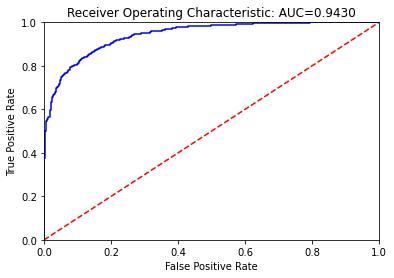

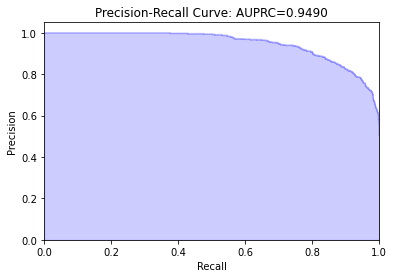

NameError: name 'result_list_gb' is not defined

In [59]:
# run the tuned GB model
print("GradientBoosting:")

start = time.time()
gb_tuned.fit(x_train,y_train)
runtime = time.time()-start
print('Training time:', runtime, 'seconds')
probs_tuned = gb_tuned.predict_proba(x_test)
result = PlotROCCurve(probs_tuned[:,1],y_test, ci=confidence_interval, random_seed=random_seed)

results = ["GB_tuned_with_MinMaxScaling"]
results.extend(result)
results.append(runtime)
result_list_gb.append(results)

In [60]:
x_train_df=pd.DataFrame(x_train)
x_train_df.head(50)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.000000,0.000000,0.000000,0.0,0.677133,1.0,0.0,0.0,2.000000,2.0,...,2.0,0.0,0.00000,2.000000,0.000000,0.000000,0.087687,0.452487,0.570346,-0.090528
1,1.000000,0.367942,1.000000,0.0,-0.100411,1.0,0.0,1.0,1.264116,2.0,...,0.0,0.0,0.00000,0.000000,1.000000,1.632058,0.425201,0.024737,-1.789008,0.962355
2,0.000000,1.000000,1.000000,0.0,-0.096554,1.0,2.0,1.0,0.000000,2.0,...,0.0,2.0,0.00000,0.000000,1.000000,2.000000,0.840481,0.152435,-0.514209,-1.384930
3,0.000000,0.000000,1.000000,1.0,-0.748080,1.0,2.0,1.0,0.000000,0.0,...,2.0,2.0,0.00000,0.000000,1.000000,2.000000,0.893658,-0.433055,-0.081401,-0.602772
4,1.000000,0.000000,1.000000,0.0,-1.114563,1.0,0.0,2.0,1.000000,1.0,...,1.0,1.0,1.00000,0.000000,0.000000,3.000000,-1.509300,-0.951772,-0.453346,-0.396834
5,0.434276,0.000000,0.000000,0.0,-0.829995,1.0,2.0,1.0,0.000000,0.0,...,0.0,2.0,2.00000,0.000000,1.000000,0.000000,0.985627,-0.506146,0.885250,-1.091807
6,1.000000,1.000000,1.000000,0.0,0.840014,1.0,2.0,1.0,0.000000,2.0,...,0.0,2.0,2.00000,0.000000,1.000000,2.000000,1.234327,1.442528,1.254216,0.666276
7,0.843903,0.156097,1.000000,0.0,1.333823,1.0,2.0,1.0,0.000000,2.0,...,0.0,0.0,0.00000,0.843903,0.156097,2.000000,0.742289,1.533657,0.160143,-0.080915
8,0.000000,0.000000,1.000000,1.0,0.269929,1.0,0.0,0.0,2.000000,0.0,...,0.0,0.0,0.00000,0.000000,0.000000,1.000000,-0.455721,-0.095323,-1.053528,0.417092
9,0.280445,0.000000,0.000000,0.0,-0.925385,0.0,1.0,0.0,0.000000,0.0,...,0.0,2.0,1.43911,0.000000,1.000000,2.000000,-0.636115,-0.819703,-1.661870,0.186914


In [61]:
# Feature importance for GB model
gb_feature_importance = pd.DataFrame(
        {
            'features': np.array(x_train_df.columns),
            'importance' : gb_tuned.feature_importances_
            })

# Set index to 'features' column
gb_feature_importance = gb_feature_importance.set_index('features')

# Check top 20 features
gb_feature_importance.sort_values(by='importance',key=lambda x:abs(x),ascending=False)[:20]

,importance
features,
14,0.260072
4,0.082932
17,0.073157
3,0.071418
18,0.068680
19,0.060973
8,0.058630
20,0.054587
15,0.053604


In [62]:
# Create DataFrame with feature numbers and their importance
gb_feature_importance = pd.DataFrame({
    'features': np.arange(len(x_train_df.columns)),  # Use numbers as feature names
    'importance': gb_tuned.feature_importances_
})

# Create a mapping dictionary to map column numbers to actual feature names
column_mapping = dict(zip(np.arange(len(x_train_df.columns)), resampled_df.columns))

# Replace feature numbers with actual feature names
gb_feature_importance['features'] = gb_feature_importance['features'].map(column_mapping)

# Set index to 'features' column
gb_feature_importance = gb_feature_importance.set_index('features')

# Check top 20 features
top_20_features = gb_feature_importance.sort_values(by='importance', key=lambda x: abs(x), ascending=False)[:20]
print(top_20_features)

                   importance
features                     
Contract             0.260072
Tenure Months        0.082932
Monthly Charges      0.073157
Dependents           0.071418
Total Charges        0.068680
Churn Value          0.060973
Online Security      0.058630
CLTV                 0.054587
Paperless Billing    0.053604
Payment Method       0.038335
Gender               0.030746
Internet Service     0.026007
Tech Support         0.025562
Partner              0.025224
Senior Citizen       0.017412
Online Backup        0.014950
Multiple Lines       0.010842
Streaming TV         0.008725
Streaming Movies     0.007579
Device Protection    0.006186


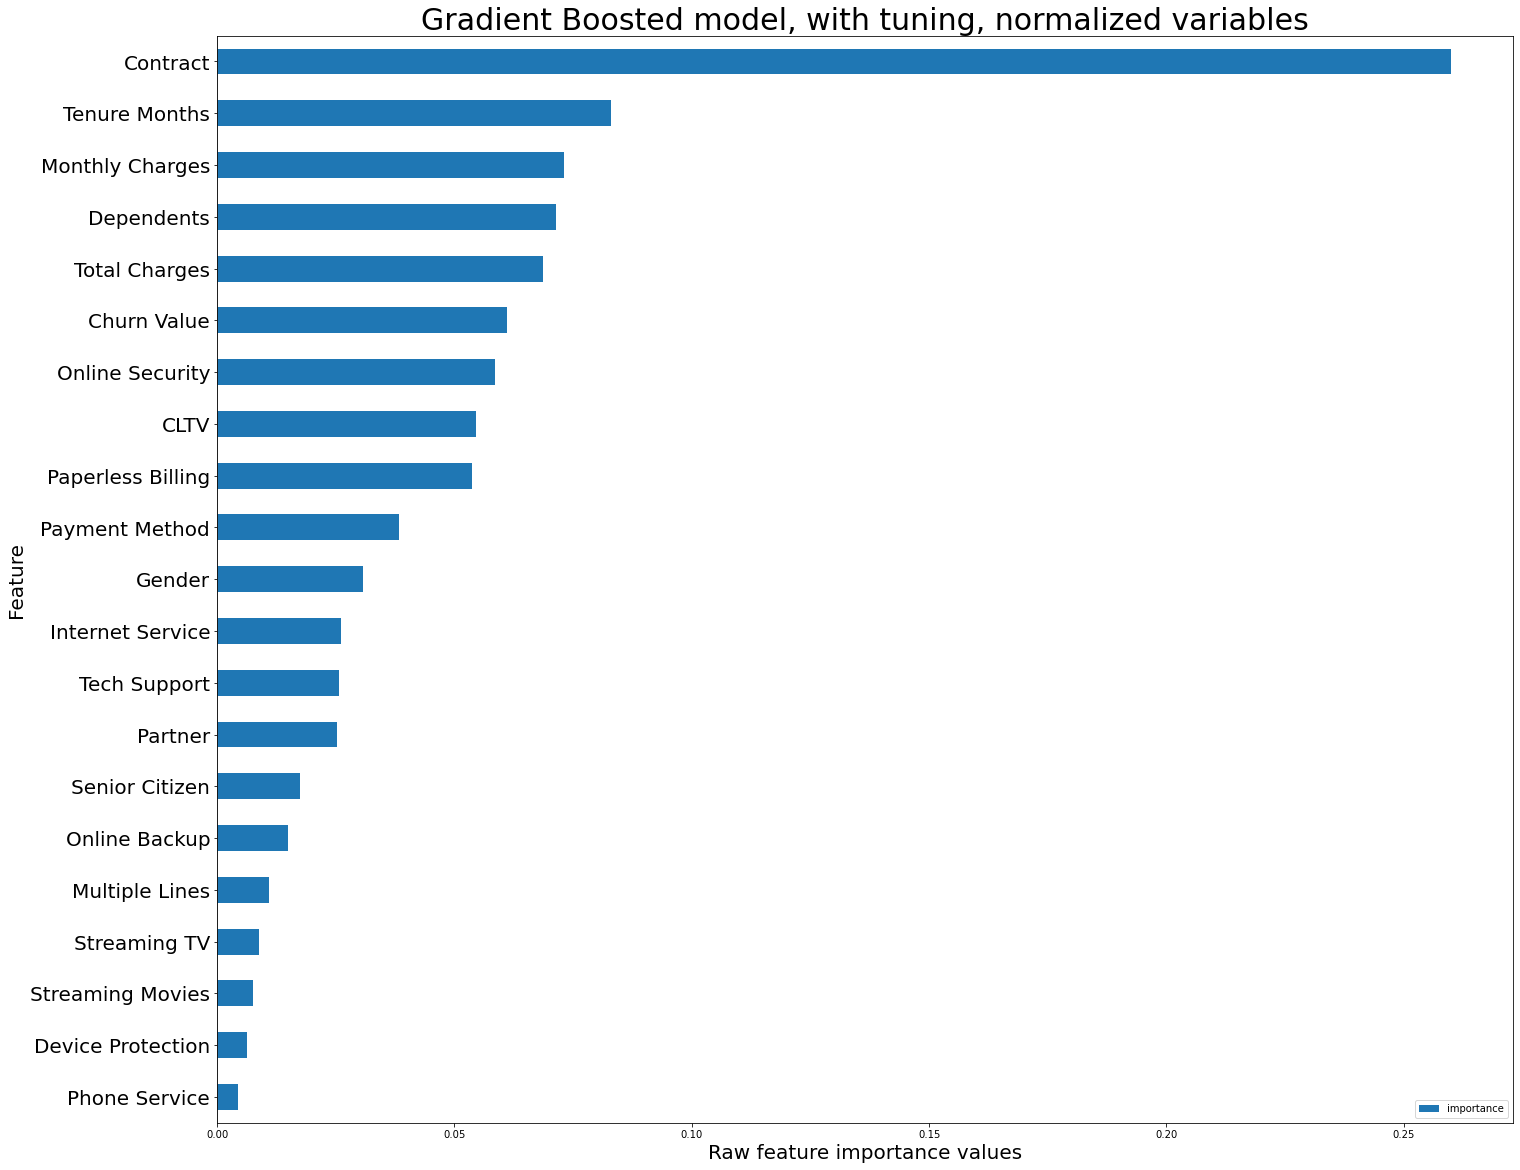

In [63]:
gb_feature_importance.sort_values(by='importance', key=lambda x: abs(x)).plot.barh(figsize=(30, 20))
plt.title("Gradient Boosted model, with tuning, normalized variables", fontsize=30)
plt.xlabel("Raw feature importance values", fontsize=20)
plt.ylabel('Feature', fontsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

plt.show()

## Hyperparameter Tuning-RF

### Hyper-parameters to tune:

*   n_estimators: [1, 2, 4, 8, 16, 32, 64, 100, 200]
*   max_depth: np.linspace(1, 10, 10, endpoint=True)
*   min_samples_split: [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
*   min_samples_leaf = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
*   max_features = [5,10,15,20,25,50,100,None]



References: https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d



## N-estimator

In [158]:
# Assign range of values for the hyperparameters

# n_estimators represents the number of trees in the forest. Usually the higher the number of trees the better to learn the data.
# However, adding a lot of trees can slow down the training process considerably
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]

#max_depth indicates how deep the built tree can be.
#The deeper the tree, the more splits it has and it captures more information about how the data.
max_depth = range(1, 10)


# min_samples_split represents the minimum number of samples required to split an internal node
# Here we will vary the parameter from 10% to 100% of the samples
min_samples_split = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

#min_samples_leaf is The minimum number of samples required to be at a leaf node.
#This similar to min_samples_splits, however, this describe the minimum number of samples of samples at the leafs.
min_samples_leaf = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

# max_features represents the number of features to consider when looking for the best split.
max_features = [5,10,15,20,25,50,100,None]

In [159]:
# Create the parameters for tuning
param_grid = {
              'n_estimators': n_estimators
              }


print(param_grid)

clf = RandomForestClassifier(random_state=1234)
# Instantiate the grid search model
rf_grid = GridSearchCV(estimator = clf, param_grid = param_grid,
                       scoring = 'roc_auc', cv = 5, refit = True,
                       n_jobs = -1, verbose = 3)

start = time.time()

# Fit the grid search model
rf_grid.fit(x_train,y_train)

runtime = time.time()-start

print('Grid Search Tuning time:', runtime, 'seconds')

rf_grid_results = pd.DataFrame(rf_grid.cv_results_)

print('Best Score: ', rf_grid.best_score_)
print('Best Params: ', rf_grid.best_params_)

# Rename mean_test_score to mean_roc_auc
rf_grid_results["mean_roc_auc"] = rf_grid_results['mean_test_score']

# For rearranging of columns
columns = [f"param_{name}" for name in param_grid.keys()]
columns += ["mean_roc_auc","rank_test_score"]

#Output results from Grid Search
rf_grid_results[columns].sort_values(by="rank_test_score", ascending=True).reset_index(drop=True)


{'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200]}
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Grid Search Tuning time: 26.928163051605225 seconds
Best Score:  0.9403086101725631
Best Params:  {'n_estimators': 200}


,param_n_estimators,mean_roc_auc,rank_test_score
0,200,0.940309,1
1,100,0.939089,2
2,64,0.938021,3
3,32,0.935080,4
4,16,0.928785,5
5,8,0.915759,6
6,4,0.888958,7
7,2,0.841946,8
8,1,0.773861,9


In [160]:
# Replace tuned parameter(s) with best value
n_estimators = []
n_estimators.append(rf_grid.best_params_['n_estimators'])

n_estimators

[200]

## max_depth

In [161]:
# Create the parameters for tuning
param_grid = {
              'n_estimators': n_estimators,
              'max_depth': max_depth
              }


print(param_grid)

clf = RandomForestClassifier(random_state=1234)
# Instantiate the grid search model
rf_grid = GridSearchCV(estimator = clf, param_grid = param_grid,
                       scoring = 'roc_auc', cv = 5, refit = True,
                       n_jobs = -1, verbose = 3)

start = time.time()

# Fit the grid search model
rf_grid.fit(x_train,y_train)

runtime = time.time()-start

print('Grid Search Tuning time:', runtime, 'seconds')

rf_grid_results = pd.DataFrame(rf_grid.cv_results_)

print('Best Score: ', rf_grid.best_score_)
print('Best Params: ', rf_grid.best_params_)

# Rename mean_test_score to mean_roc_auc
rf_grid_results["mean_roc_auc"] = rf_grid_results['mean_test_score']

# For rearranging of columns
columns = [f"param_{name}" for name in param_grid.keys()]
columns += ["mean_roc_auc","rank_test_score"]

#Output results from Grid Search
rf_grid_results[columns].sort_values(by="rank_test_score", ascending=True).reset_index(drop=True)

{'n_estimators': [200], 'max_depth': range(1, 10)}
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Grid Search Tuning time: 48.73015117645264 seconds
Best Score:  0.9212622915515756
Best Params:  {'max_depth': 9, 'n_estimators': 200}


,param_n_estimators,param_max_depth,mean_roc_auc,rank_test_score
0,200,9,0.921262,1
1,200,8,0.916433,2
2,200,7,0.909671,3
3,200,6,0.904073,4
4,200,5,0.896735,5
5,200,4,0.888481,6
6,200,3,0.880296,7
7,200,2,0.870311,8
8,200,1,0.862945,9


In [162]:
# Replace tuned parameter(s) with best value
max_depth = []
max_depth.append(rf_grid.best_params_['max_depth'])

max_depth

[9]

## Min_samples_split

In [163]:
# Create the parameters for tuning
param_grid = {
              'n_estimators': n_estimators,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split
              }


print(param_grid)

clf = RandomForestClassifier(random_state=1234)
# Instantiate the grid search model
rf_grid = GridSearchCV(estimator = clf, param_grid = param_grid,
                       scoring = 'roc_auc', cv = 5, refit = True,
                       n_jobs = -1, verbose = 3)

start = time.time()

# Fit the grid search model
rf_grid.fit(x_train,y_train)

runtime = time.time()-start

print('Grid Search Tuning time:', runtime, 'seconds')

rf_grid_results = pd.DataFrame(rf_grid.cv_results_)

print('Best Score: ', rf_grid.best_score_)
print('Best Params: ', rf_grid.best_params_)

# Rename mean_test_score to mean_roc_auc
rf_grid_results["mean_roc_auc"] = rf_grid_results['mean_test_score']

# For rearranging of columns
columns = [f"param_{name}" for name in param_grid.keys()]
columns += ["mean_roc_auc","rank_test_score"]

#Output results from Grid Search
rf_grid_results[columns].sort_values(by="rank_test_score", ascending=True).reset_index(drop=True)

{'n_estimators': [200], 'max_depth': [9], 'min_samples_split': [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Grid Search Tuning time: 66.98994278907776 seconds
Best Score:  0.9212622915515756
Best Params:  {'max_depth': 9, 'min_samples_split': 2, 'n_estimators': 200}


,param_n_estimators,param_max_depth,param_min_samples_split,mean_roc_auc,rank_test_score
0,200,9,2,0.921262,1
1,200,9,4,0.921125,2
2,200,9,8,0.920712,3
3,200,9,16,0.919402,4
4,200,9,32,0.917305,5
5,200,9,64,0.913674,6
6,200,9,128,0.907131,7
7,200,9,256,0.898569,8
8,200,9,512,0.888746,9
9,200,9,1024,0.879648,10


In [164]:
# Replace tuned parameter(s) with best value
min_samples_split = []
min_samples_split.append(rf_grid.best_params_['min_samples_split'])

min_samples_split

[2]

## Min_samples_leaf

In [165]:
# Create the parameters for tuning
param_grid = {
              'n_estimators': n_estimators,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf
              }


print(param_grid)

clf = RandomForestClassifier(random_state=1234)
# Instantiate the grid search model
rf_grid = GridSearchCV(estimator = clf, param_grid = param_grid,
                       scoring = 'roc_auc', cv = 5, refit = True,
                       n_jobs = -1, verbose = 3)

start = time.time()

# Fit the grid search model
rf_grid.fit(x_train,y_train)

runtime = time.time()-start

print('Grid Search Tuning time:', runtime, 'seconds')

rf_grid_results = pd.DataFrame(rf_grid.cv_results_)

print('Best Score: ', rf_grid.best_score_)
print('Best Params: ', rf_grid.best_params_)

# Rename mean_test_score to mean_roc_auc
rf_grid_results["mean_roc_auc"] = rf_grid_results['mean_test_score']

# For rearranging of columns
columns = [f"param_{name}" for name in param_grid.keys()]
columns += ["mean_roc_auc","rank_test_score"]

#Output results from Grid Search
rf_grid_results[columns].sort_values(by="rank_test_score", ascending=True).reset_index(drop=True)


{'n_estimators': [200], 'max_depth': [9], 'min_samples_split': [2], 'min_samples_leaf': [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]}
Fitting 5 folds for each of 11 candidates, totalling 55 fits
Grid Search Tuning time: 69.4699273109436 seconds
Best Score:  0.9212622915515756
Best Params:  {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


,param_n_estimators,param_max_depth,param_min_samples_split,param_min_samples_leaf,mean_roc_auc,rank_test_score
0,200,9,2,1,0.921262,1
1,200,9,2,2,0.920857,2
2,200,9,2,4,0.919712,3
3,200,9,2,8,0.916777,4
4,200,9,2,16,0.911632,5
5,200,9,2,32,0.903891,6
6,200,9,2,64,0.895702,7
7,200,9,2,128,0.887907,8
8,200,9,2,256,0.879201,9
9,200,9,2,512,0.870876,10


In [166]:
# Replace tuned parameter(s) with best value
Min_samples_leaf = []
Min_samples_leaf.append(rf_grid.best_params_['max_depth'])

Min_samples_leaf

[9]

In [167]:
#Print hyperparameters used in the tuned model
print('Parameters currently in use:\n')
print(rf_grid.best_params_)

Parameters currently in use:

{'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [168]:
# assign the best estimator to to log_reg_tuned
rf_tuned = rf_grid.best_estimator_
rf_tuned

RandomForestClassifier(max_depth=9, n_estimators=200, random_state=1234)

In [172]:
result_list_rf=[]

Tuned-RF:
Training time: 2.0915753841400146 seconds
AUC: 0.9208001867413632
AUPRC: 0.91051820217433
Sensitivity: 0.8447619047619047
Specificity: 0.861764705882353
Score thresold: 0.5616202308872288
2.5 97.5


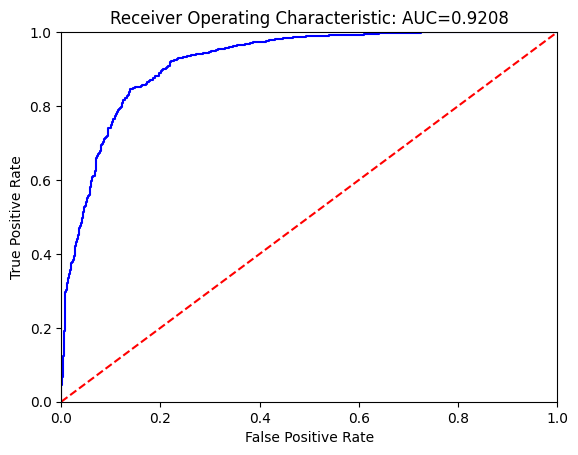

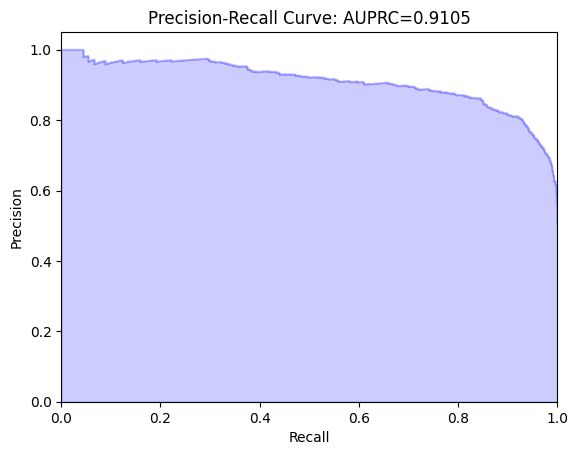

In [173]:
# run the tuned RF model
print("Tuned-RF:")

start = time.time()
rf_tuned.fit(x_train,y_train)
runtime = time.time()-start
print('Training time:', runtime, 'seconds')
probs_tuned = rf_tuned.predict_proba(x_test)
result = PlotROCCurve(probs_tuned[:,1],y_test, ci=confidence_interval, random_seed=random_seed)

results = ["RF_tuned_with_MinMaxScaling"]
results.extend(result)
results.append(runtime)
result_list_rf.append(results)

In [177]:
# Feature importance for RF model
rf_feature_importance = pd.DataFrame(
        {
            'features': np.array(x_train_df.columns),
            'importance' : rf_tuned.feature_importances_
            })

# Check top 20 features
rf_feature_importance.sort_values(by='importance',key=lambda x:abs(x),ascending=False)[:20]

,features,importance
14,14,0.213002
4,4,0.104227
3,3,0.098002
8,8,0.069862
11,11,0.066365
17,17,0.060801
18,18,0.058698
16,16,0.055659
15,15,0.053306
7,7,0.043672


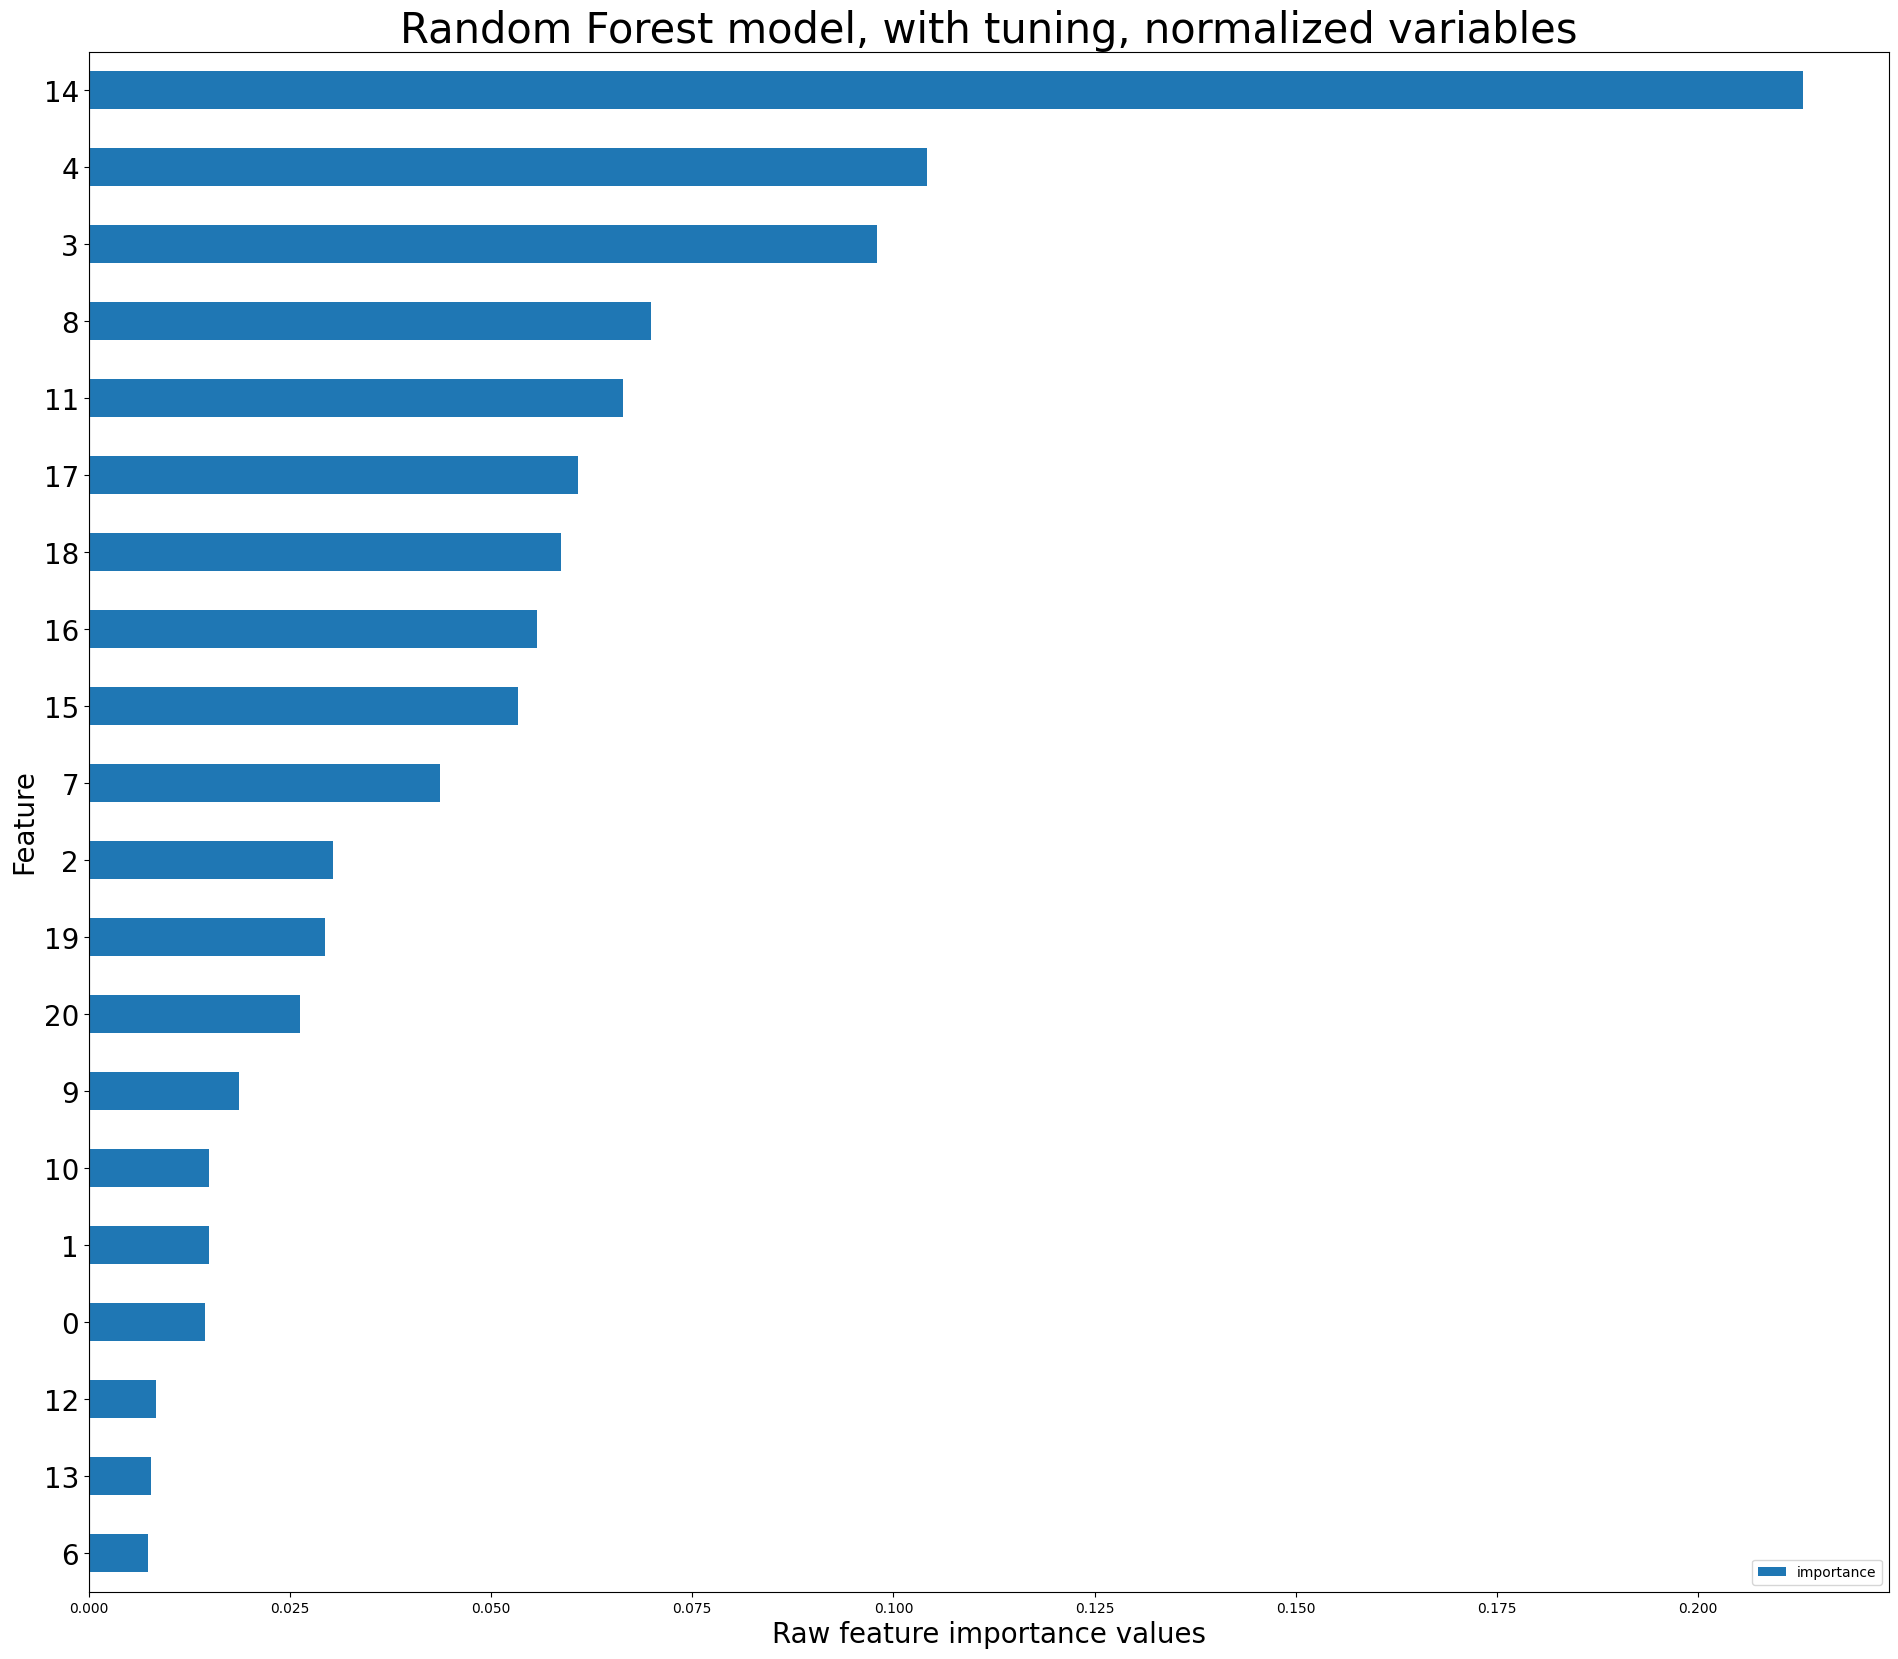

In [179]:
# Plot feature importance bar chart

sorted_feature_importance = rf_feature_importance.sort_values(by='importance',key=lambda x:abs(x),ascending=False)[:20].set_index('features')

sorted_feature_importance.sort_values(by='importance',key=lambda x:abs(x)).plot.barh(figsize=(30, 20))
plt.title("Random Forest model, with tuning, normalized variables", fontsize=30)
plt.xlabel("Raw feature importance values", fontsize=20)
plt.ylabel('Feature',fontsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)